In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from scipy.optimize import curve_fit
from tqdm.auto import trange
from tqdm import tqdm
import Metropolis_Algorithm as MA

import importlib

importlib.reload(MA)

# Setting Constants
x_0 = 0
y_0 = 0
t_i = 0
t_f = 8

mass = 1
steps = 130  # Reduced from 800 - fewer points to update
numb_paths = 1000

times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Potential
def x_potential(x):
    return 1/2 * x**2

def y_potential(x):
    return 1000 * x**4

def ho_analytic_pdf(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x**2)

def residual_calculator(x_values, model, model_parameters, y_values, y_errors):
    theoretical_values = model(x_values, *model_parameters)
    residuals = (y_values - theoretical_values)/y_errors
    return residuals

In [10]:
# Initialize paths (Brownian bridge from 0 to 0)
paths_x = np.array([
    MA.Pos_Gen(0.0, 0.0, steps, dt)
    for _ in range(numb_paths)
])

C = 1.8437008005694266

mid = paths_x.shape[1] // 2
thin = 10
sigma_prop = C * np.sqrt(dt)

# Thermalization
print("Thermalizing...")
for sweep in trange(500, desc="Thermalising", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if sweep % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

# Sampling
print("\nSampling...")
samples_x = []

for k in trange(5000, desc="Sampling", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if k % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

    if k % thin == 0:
        samples_x.append(paths_x[:, -1].copy())

samples_x = np.concatenate(samples_x)

# Compute PDF
x_bins = np.linspace(-2, 2, 201)
pdf_unnormalised_x, bin_edges_x = np.histogram(samples_x, bins=x_bins)

x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]

pdf_x = pdf_unnormalised_x / np.sum(pdf_unnormalised_x * dx)

# Analytic PDF
phi_sq_analytic_x = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic_x /= np.sum(phi_sq_analytic_x * dx)

# Statistics
mean_square_x = np.mean(samples_x ** 2)
rms = np.sqrt(mean_square_x)
std = np.std(samples_x)


Thermalizing...


Thermalising:  26%|██▌       | 131/500 [00:00<00:00, 723.15it/s]

Endpoint acceptance ≈ 0.520
Endpoint acceptance ≈ 0.543


Thermalising:  70%|███████   | 350/500 [00:00<00:00, 775.70it/s]

Endpoint acceptance ≈ 0.513
Endpoint acceptance ≈ 0.525


Thermalising: 100%|██████████| 500/500 [00:00<00:00, 715.62it/s]


Endpoint acceptance ≈ 0.522

Sampling...


Sampling:   1%|          | 53/5000 [00:00<00:05, 824.66it/s]

Endpoint acceptance ≈ 0.516


Sampling:   3%|▎         | 153/5000 [00:00<00:06, 719.78it/s]

Endpoint acceptance ≈ 0.544


Sampling:   5%|▍         | 248/5000 [00:00<00:06, 777.62it/s]

Endpoint acceptance ≈ 0.524


Sampling:   7%|▋         | 349/5000 [00:00<00:06, 751.87it/s]

Endpoint acceptance ≈ 0.537


Sampling:   9%|▉         | 453/5000 [00:00<00:05, 761.35it/s]

Endpoint acceptance ≈ 0.572


Sampling:  11%|█         | 555/5000 [00:00<00:05, 800.01it/s]

Endpoint acceptance ≈ 0.502


Sampling:  13%|█▎        | 655/5000 [00:00<00:05, 789.82it/s]

Endpoint acceptance ≈ 0.490


Sampling:  15%|█▌        | 756/5000 [00:00<00:05, 815.61it/s]

Endpoint acceptance ≈ 0.529


Sampling:  17%|█▋        | 854/5000 [00:01<00:05, 792.74it/s]

Endpoint acceptance ≈ 0.504


Sampling:  19%|█▉        | 955/5000 [00:01<00:05, 784.32it/s]

Endpoint acceptance ≈ 0.512


Sampling:  21%|██        | 1055/5000 [00:01<00:05, 761.86it/s]

Endpoint acceptance ≈ 0.516


Sampling:  23%|██▎       | 1155/5000 [00:01<00:05, 762.42it/s]

Endpoint acceptance ≈ 0.500


Sampling:  25%|██▌       | 1256/5000 [00:01<00:04, 803.20it/s]

Endpoint acceptance ≈ 0.543


Sampling:  27%|██▋       | 1352/5000 [00:01<00:04, 767.82it/s]

Endpoint acceptance ≈ 0.504


Sampling:  29%|██▉       | 1449/5000 [00:01<00:04, 753.62it/s]

Endpoint acceptance ≈ 0.532


Sampling:  31%|███       | 1553/5000 [00:02<00:04, 747.12it/s]

Endpoint acceptance ≈ 0.543


Sampling:  33%|███▎      | 1655/5000 [00:02<00:04, 818.67it/s]

Endpoint acceptance ≈ 0.547


Sampling:  35%|███▌      | 1754/5000 [00:02<00:04, 761.06it/s]

Endpoint acceptance ≈ 0.563


Sampling:  37%|███▋      | 1853/5000 [00:02<00:04, 769.98it/s]

Endpoint acceptance ≈ 0.524


Sampling:  39%|███▉      | 1954/5000 [00:02<00:04, 753.37it/s]

Endpoint acceptance ≈ 0.522


Sampling:  41%|████      | 2055/5000 [00:02<00:03, 813.67it/s]

Endpoint acceptance ≈ 0.530


Sampling:  43%|████▎     | 2154/5000 [00:02<00:03, 771.51it/s]

Endpoint acceptance ≈ 0.506


Sampling:  45%|████▌     | 2253/5000 [00:02<00:03, 774.86it/s]

Endpoint acceptance ≈ 0.533


Sampling:  47%|████▋     | 2354/5000 [00:03<00:03, 768.12it/s]

Endpoint acceptance ≈ 0.528


Sampling:  49%|████▉     | 2447/5000 [00:03<00:03, 723.18it/s]

Endpoint acceptance ≈ 0.526


Sampling:  51%|█████     | 2538/5000 [00:03<00:03, 670.13it/s]

Endpoint acceptance ≈ 0.545


Sampling:  53%|█████▎    | 2642/5000 [00:03<00:03, 709.93it/s]

Endpoint acceptance ≈ 0.510


Sampling:  55%|█████▍    | 2744/5000 [00:03<00:02, 771.05it/s]

Endpoint acceptance ≈ 0.532


Sampling:  57%|█████▋    | 2852/5000 [00:03<00:02, 767.42it/s]

Endpoint acceptance ≈ 0.529


Sampling:  59%|█████▉    | 2953/5000 [00:03<00:02, 838.58it/s]

Endpoint acceptance ≈ 0.533


Sampling:  61%|██████    | 3054/5000 [00:04<00:02, 799.13it/s]

Endpoint acceptance ≈ 0.511


Sampling:  63%|██████▎   | 3154/5000 [00:04<00:02, 765.07it/s]

Endpoint acceptance ≈ 0.506


Sampling:  65%|██████▌   | 3255/5000 [00:04<00:02, 759.64it/s]

Endpoint acceptance ≈ 0.540


Sampling:  67%|██████▋   | 3356/5000 [00:04<00:02, 808.37it/s]

Endpoint acceptance ≈ 0.537


Sampling:  69%|██████▉   | 3454/5000 [00:04<00:02, 754.08it/s]

Endpoint acceptance ≈ 0.532


Sampling:  71%|███████   | 3555/5000 [00:04<00:01, 845.67it/s]

Endpoint acceptance ≈ 0.502


Sampling:  73%|███████▎  | 3656/5000 [00:04<00:01, 792.87it/s]

Endpoint acceptance ≈ 0.529


Sampling:  75%|███████▌  | 3754/5000 [00:04<00:01, 816.93it/s]

Endpoint acceptance ≈ 0.528


Sampling:  77%|███████▋  | 3856/5000 [00:05<00:01, 778.32it/s]

Endpoint acceptance ≈ 0.521


Sampling:  79%|███████▉  | 3955/5000 [00:05<00:01, 773.36it/s]

Endpoint acceptance ≈ 0.524


Sampling:  81%|████████  | 4054/5000 [00:05<00:01, 773.83it/s]

Endpoint acceptance ≈ 0.519


Sampling:  83%|████████▎ | 4154/5000 [00:05<00:01, 758.32it/s]

Endpoint acceptance ≈ 0.532


Sampling:  85%|████████▌ | 4253/5000 [00:05<00:01, 738.30it/s]

Endpoint acceptance ≈ 0.533


Sampling:  87%|████████▋ | 4351/5000 [00:05<00:00, 738.14it/s]

Endpoint acceptance ≈ 0.545


Sampling:  89%|████████▉ | 4454/5000 [00:05<00:00, 797.94it/s]

Endpoint acceptance ≈ 0.484


Sampling:  91%|█████████ | 4555/5000 [00:06<00:00, 760.81it/s]

Endpoint acceptance ≈ 0.533


Sampling:  93%|█████████▎| 4652/5000 [00:06<00:00, 730.51it/s]

Endpoint acceptance ≈ 0.511


Sampling:  95%|█████████▌| 4750/5000 [00:06<00:00, 718.63it/s]

Endpoint acceptance ≈ 0.538


Sampling:  97%|█████████▋| 4852/5000 [00:06<00:00, 741.64it/s]

Endpoint acceptance ≈ 0.500


Sampling:  99%|█████████▉| 4955/5000 [00:06<00:00, 818.59it/s]

Endpoint acceptance ≈ 0.521


Sampling: 100%|██████████| 5000/5000 [00:06<00:00, 758.78it/s]



------ Results ------
Numerical PDF area: 1.00000
Analytic PDF area: 1.00000
Standard deviation: 0.7921 (expected ≈ 0.707)
Root mean square: 0.7931 (expected ≈ 0.707)


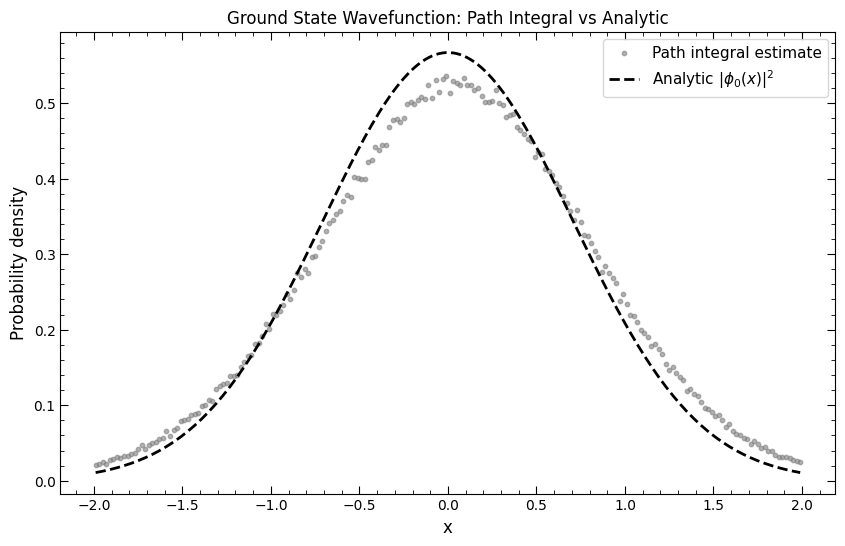

In [11]:
pc_savepath_metropolis_groundstate = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\metropolis_groundstate.svg"
laptop_savepath_metropolis_groundstate = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\metropolis_groundstate.svg"

print("\n------ Results ------")
print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic_x * dx):.5f}")
print(f"Standard deviation: {std:.4f} (expected ≈ 0.707)")
print(f"Root mean square: {rms:.4f} (expected ≈ 0.707)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=10, alpha=0.6, color='grey')
plt.plot(x_centres, phi_sq_analytic_x, 'black', linestyle='--', linewidth=2, label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=11)
plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.title('Ground State Wavefunction: Path Integral vs Analytic')

plt.savefig(pc_savepath_metropolis_groundstate, bbox_inches='tight')
plt.show()